In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
veriler = pd.read_csv('veri.csv')

In [20]:
# dataframe
X = veriler.iloc[:, 0:3]
Y = veriler.iloc[:, 3:]
# array
x = X.values
y = Y.values 

In [21]:
from sklearn.model_selection import train_test_split

# verinin yuzde 66 si antrenman icin kullanilsin kalan yuzde 33'u test edilsin diye ayrdik
# random_state rastsal ayirma icin kullaniliyor ayni degeri alan her kod ayni ayrimi yapar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [22]:
def egitim(n):
    import keras

    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()

    model.add(Dense(
        n,
        kernel_initializer = "uniform",
        activation = "tanh",
        input_dim = 3,
        name = "gir")
        )
    model.add(Dense(
        1,
        kernel_initializer = "uniform", 
        activation = "sigmoid", 
        name = "cik")
        )

    model.compile(
        optimizer = 'Adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])

    model.fit(x_train, y_train, epochs = 50, verbose = 0)
    return model.predict(x_test), model.evaluate(x_test, model.predict(x_test), verbose=0)[0]

In [26]:
dogruluk = []
## STEP FUNCTION
for j in range(1, 6):
    cikti, oran = egitim(j)
    dogruluk.append(1 if  oran > 0.5 else 0)

In [27]:
dogruluk

[1, 1, 1, 1, 1]

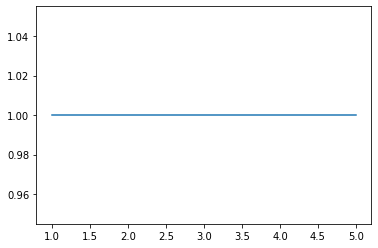

In [28]:
plt.plot([1, 2, 3, 4, 5], dogruluk)
plt.show()